# 1. 로지스틱회귀
### 1) 합격여부 데이터읽기

In [17]:
import numpy as np
import pandas as pd

data = pd.read_csv('admit.txt', names = ['ex1','ex2','Admitted'])
print data 

x = np.c_[data['ex1'],data['ex2']]
y = data['Admitted']
m=len(data)

          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
5   45.083277  56.316372         0
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
10  95.861555  38.225278         0
11  75.013658  30.603263         0
12  82.307053  76.481963         1
13  69.364589  97.718692         1
14  39.538339  76.036811         0
15  53.971052  89.207350         1
16  69.070144  52.740470         1
17  67.946855  46.678574         0
18  70.661510  92.927138         1
19  76.978784  47.575964         1
20  67.372028  42.838438         0
21  89.676776  65.799366         1
22  50.534788  48.855812         0
23  34.212061  44.209529         0
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
27  93.114389  38.80

In [18]:
print x.shape, y.shape

(100, 2) (100,)


### 2) 그래프그리기

In [19]:
pos = []
neg = []

for (i,val) in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)
print pos
print neg

[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


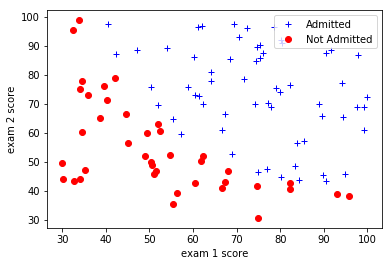

In [20]:
import matplotlib.pyplot as plt
plt.plot(x[pos,0].reshape(-1), x[pos,1].reshape(-1), 'b+', label = 'Admitted')
plt.plot(x[neg,0].reshape(-1), x[neg,1].reshape(-1), 'ro', label = 'Not Admitted')
plt.xlabel("exam 1 score")
plt.ylabel("exam 2 score")
plt.legend(loc = 'upper right')
plt.show()

### 3) 학습

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'liblinear',C=10)
log_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
log_reg.predict([[30,70],
                 [50,90]])

array([0, 1])

### 4) decision boundary

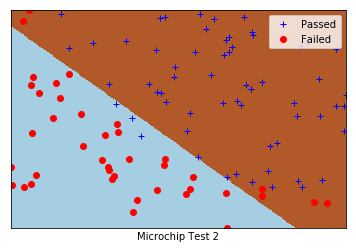

In [23]:
x_min,x_max = x[:,0].min(), x[:,0].max()
y_min,y_max = x[:,1].min(), x[:,1].max()
h = .2
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

z=z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)

plt.plot(x[pos,0].reshape(-1),x[pos,1].reshape(-1), 'b+', label = 'Passed')
plt.plot(x[neg,0].reshape(-1),x[neg,1].reshape(-1), 'ro', label = 'Failed')
plt.xlabel("Microchip Test 1")
plt.xlabel("Microchip Test 2")
plt.legend(loc = 'upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()